In [60]:
import prophet 
# video link https://youtu.be/kx-Lz4Yvy9E
# source link https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

In [35]:
import plotly.offline as py

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [37]:
df = pd.read_csv('Border_Crossing_Entry_Data.csv')

In [38]:
df.head()
print("shape", df.shape)

shape (387324, 10)


In [39]:
df['Date'] = pd.DatetimeIndex(df['Date'])

In [40]:
df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Latitude            float64
Longitude           float64
Point                object
dtype: object

In [41]:
remove = ['Port Name','Port Code','Measure','Latitude','Longitude','Point']

In [42]:
df.drop(remove, inplace=True, axis=1)


In [43]:
df.dtypes

State             object
Border            object
Date      datetime64[ns]
Value              int64
dtype: object

In [44]:
df = df[df.State == 'Texas']

In [45]:
print("shape", df.shape)

shape (40962, 4)


In [46]:
df.head()

,State,Border,Date,Value
6,Texas,US-Mexico Border,2023-08-01,47
10,Texas,US-Mexico Border,2023-06-01,252039
13,Texas,US-Mexico Border,2023-02-01,229763
20,Texas,US-Mexico Border,2022-09-01,19
28,Texas,US-Mexico Border,2022-02-01,1988


In [47]:
print(df.tail(10))

        State            Border       Date   Value
387236  Texas  US-Mexico Border 1997-06-01      12
387240  Texas  US-Mexico Border 1996-07-01   34061
387243  Texas  US-Mexico Border 1997-06-01   31671
387266  Texas  US-Mexico Border 1997-08-01     101
387285  Texas  US-Mexico Border 1996-11-01     427
387292  Texas  US-Mexico Border 1996-09-01       0
387293  Texas  US-Mexico Border 1997-08-01    3135
387295  Texas  US-Mexico Border 1996-12-01       0
387298  Texas  US-Mexico Border 1997-09-01    7523
387300  Texas  US-Mexico Border 1997-09-01  514253


In [52]:
remove = ['State','Border']

In [53]:
df.drop(remove, inplace=True, axis=1)

In [54]:
df.dtypes

Date     datetime64[ns]
Value             int64
dtype: object

In [55]:
df = df.rename(columns={'Date': 'ds',
                        'Value': 'y'})

In [56]:
df.head()

,ds,y
6,2023-08-01,47
10,2023-06-01,252039
13,2023-02-01,229763
20,2022-09-01,19
28,2022-02-01,1988


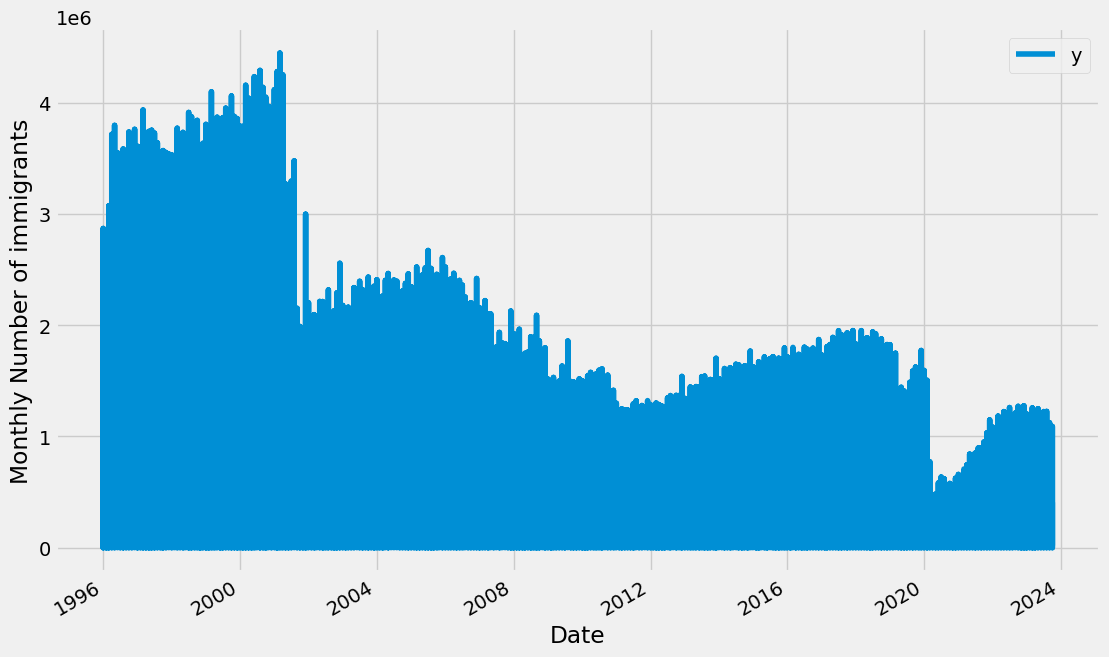

In [57]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of immigrants')
ax.set_xlabel('Date')

plt.show()

In [62]:
my_model = prophet(interval_width=0.95)

TypeError: 'module' object is not callable